Heart disease dataset analysis and model training

In [1]:
import pandas as pd
df = pd.read_csv('heart.csv')

In [2]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [3]:
df.shape

(270, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [7]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
df_encoded["Heart Disease"] = df_encoded["Heart Disease"].map({
    "Presence": 1,
    "Absence": 0
})


In [12]:
df_encoded = df_encoded.select_dtypes(include=["int64", "float64"])


In [13]:
corr_matrix = df_encoded.corr()


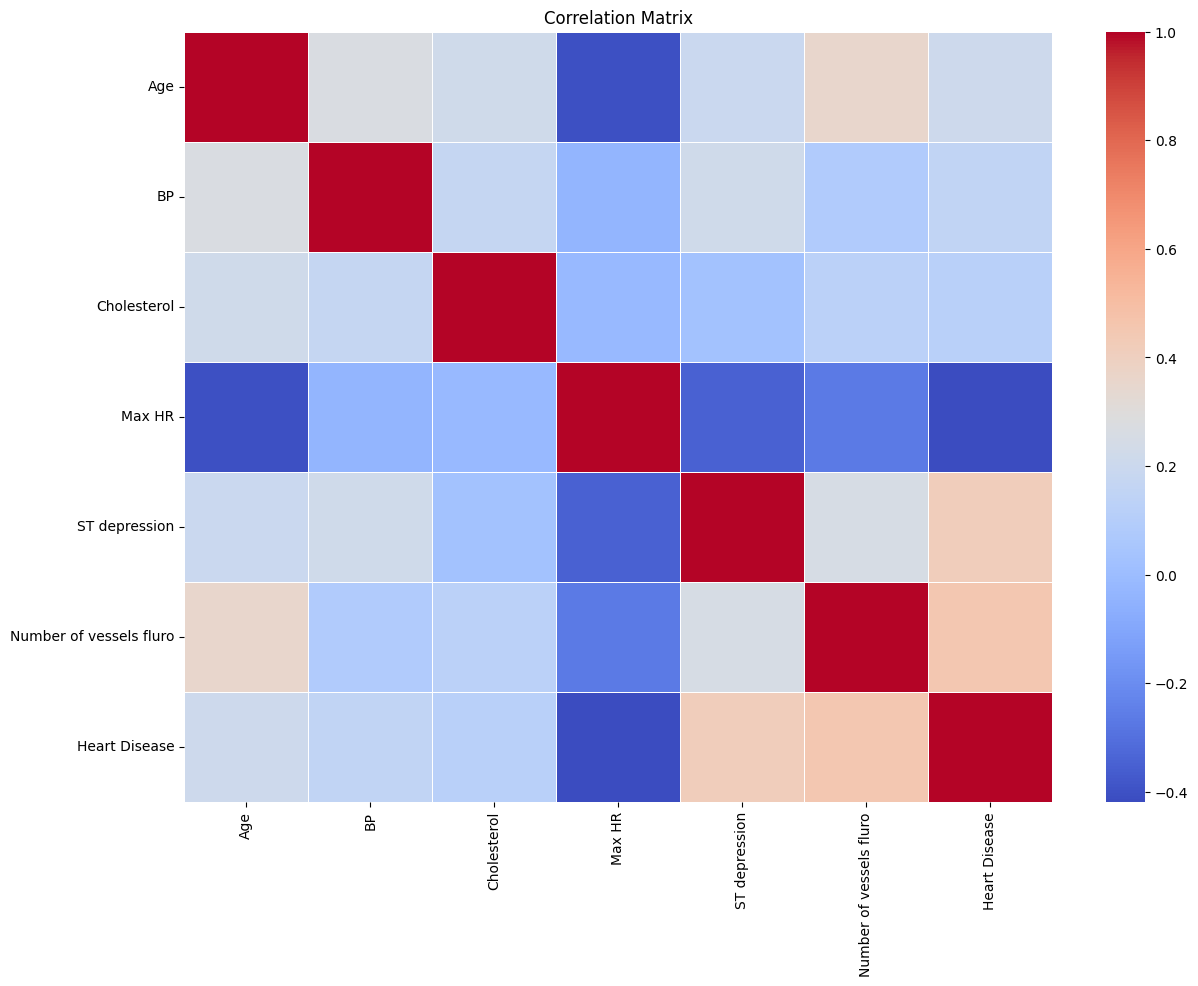

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [15]:
df_numeric = df.select_dtypes(include=["int64", "float64"])


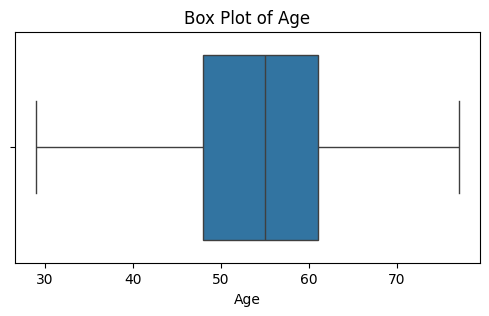

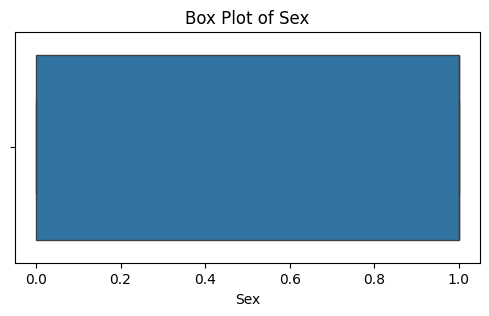

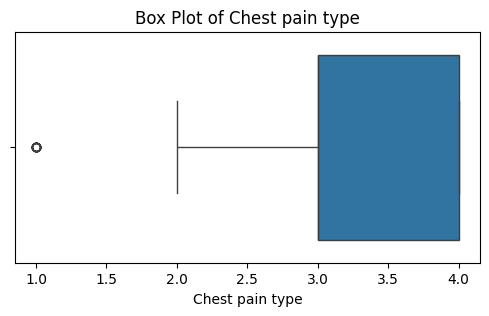

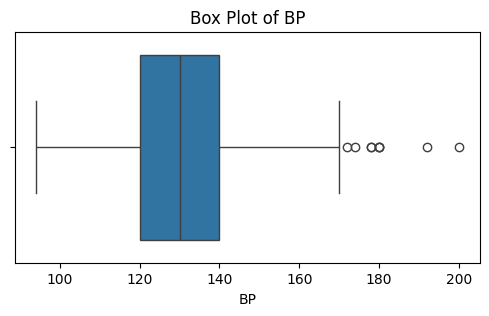

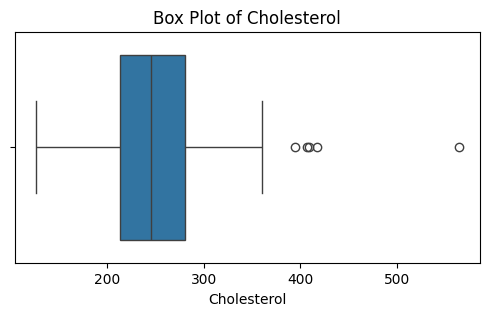

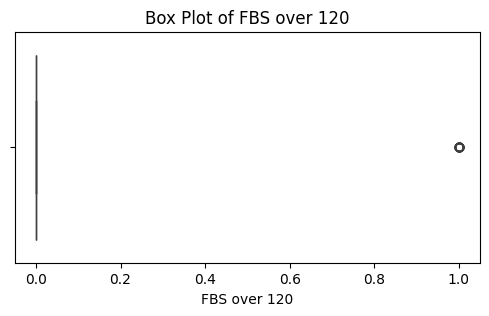

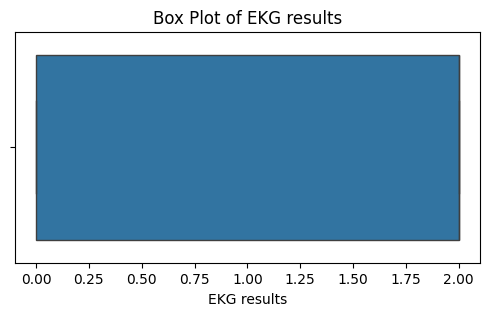

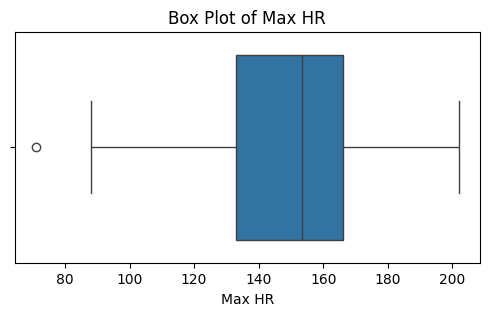

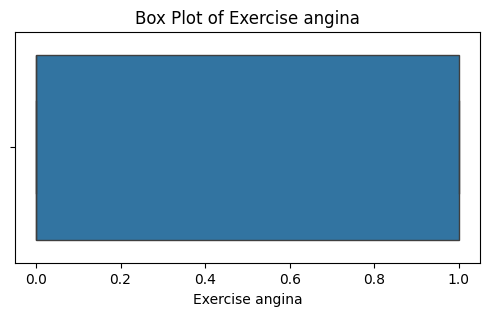

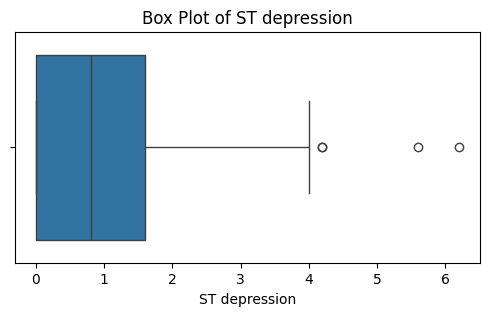

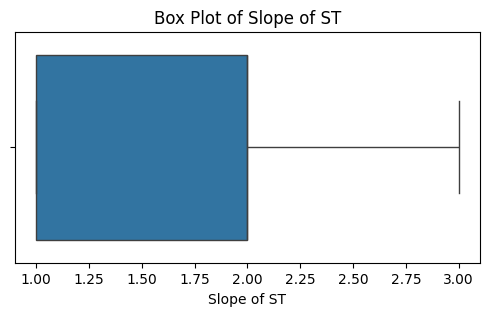

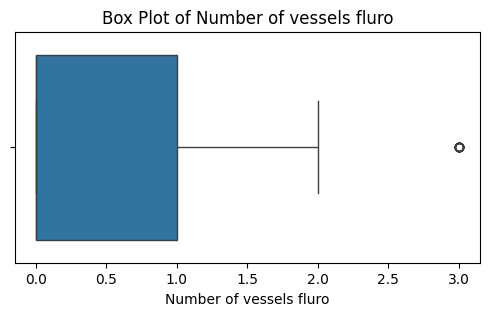

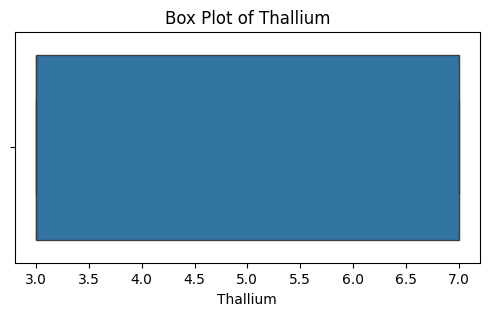

In [17]:
for col in df_numeric.columns:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df_numeric[col])
    plt.title(f"Box Plot of {col}")
    plt.show()


In [18]:
import pandas as pd

df_clean = df.copy()

numeric_cols = df_clean.select_dtypes(include=["int64", "float64"]).columns

for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

df_clean.shape


(192, 14)

In [19]:
df_clean.head(10)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence
10,59,1,4,135,234,0,0,161,0,0.5,2,0,7,Absence
11,53,1,4,142,226,0,2,111,1,0.0,1,0,7,Absence
12,44,1,3,140,235,0,2,180,0,0.0,1,0,3,Absence
14,57,0,4,128,303,0,2,159,0,0.0,1,1,3,Absence


In [20]:
df_clean["Heart Disease"] = df_clean["Heart Disease"].map({
    "Presence": 1,
    "Absence": 0
})

In [21]:
df_clean["Heart Disease"].value_counts()


,count
Heart Disease,
0,112
1,80


In [22]:
df_clean.head(10)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,0
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,1
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,1
10,59,1,4,135,234,0,0,161,0,0.5,2,0,7,0
11,53,1,4,142,226,0,2,111,1,0.0,1,0,7,0
12,44,1,3,140,235,0,2,180,0,0.0,1,0,3,0
14,57,0,4,128,303,0,2,159,0,0.0,1,1,3,0


In [27]:
corr_matrix = df_clean.corr()

target_corr = corr_matrix["Heart Disease"].abs()


In [28]:
threshold = 0.5

selected_features = target_corr[target_corr > threshold].index.tolist()
selected_features

['Thallium', 'Heart Disease']

In [29]:
df_selected = df_clean[selected_features]
df_selected.head()


,Thallium,Heart Disease
2,7,1
3,7,0
4,3,0
5,7,0
7,7,1


In [30]:
corr = df_clean.corr()["Heart Disease"].sort_values(ascending=False)
corr


,Heart Disease
Heart Disease,1.000000
Thallium,0.598782
Number of vessels fluro,0.474720
ST depression,0.472007
Chest pain type,0.467068
Exercise angina,0.421668
Sex,0.395919
Slope of ST,0.346492
Age,0.219552
EKG results,0.188217


In [31]:
threshold = 0.5

important_features = corr[abs(corr) >= threshold]
weak_features = corr[abs(corr) < threshold]

important_features, weak_features


(Heart Disease    1.000000
 Thallium         0.598782
 Name: Heart Disease, dtype: float64,
 Number of vessels fluro    0.474720
 ST depression              0.472007
 Chest pain type            0.467068
 Exercise angina            0.421668
 Sex                        0.395919
 Slope of ST                0.346492
 Age                        0.219552
 EKG results                0.188217
 BP                         0.099870
 Cholesterol                0.089817
 Max HR                    -0.429397
 Name: Heart Disease, dtype: float64)

In [40]:
df_clean = df_clean.drop(columns=["FBS over 120"])

KeyError: "['FBS over 120'] not found in axis"

In [41]:
from sklearn.preprocessing import StandardScaler

X = df_clean.drop("Heart Disease", axis=1)
y = df_clean["Heart Disease"]


In [42]:
from sklearn.preprocessing import StandardScaler

# Binary columns (do NOT scale)
binary_cols = ["Sex"]

# Continuous columns (scale these)
continuous_cols = [col for col in X.columns if col not in binary_cols]


In [43]:
scaler = StandardScaler()

X_scaled = X.copy()
X_scaled[continuous_cols] = scaler.fit_transform(X[continuous_cols])


In [44]:
X_scaled.head(5)

,Age,Sex,Chest pain type,BP,Cholesterol,EKG results,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
2,0.418518,1,-1.744831,-0.249100,0.338402,-0.956674,-0.682385,-0.621860,-0.912059,-0.685180,1.262250
3,1.184852,1,0.862232,0.014411,0.384029,-0.956674,1.465449,-0.720944,0.821756,0.760474,1.262250
4,2.279613,0,-1.744831,-0.512612,0.520910,1.050773,1.465449,-0.720944,-0.912059,0.760474,-0.822498
5,1.294328,1,0.862232,-0.512612,-1.577940,-0.956674,-0.682385,-0.522775,-0.912059,-0.685180,1.262250
7,0.637471,1,0.862232,-1.171390,-0.163497,1.050773,1.465449,0.269903,0.821756,0.760474,1.262250


In [84]:
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [46]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (153, 11)
X_test shape: (39, 11)
y_train shape: (153,)
y_test shape: (39,)


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [49]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM (RBF Kernel)": SVC(kernel="rbf"),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}


In [50]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc


In [51]:
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")


Logistic Regression: 0.8462
SVM (RBF Kernel): 0.8718
Random Forest: 0.8974
KNN: 0.7692
Gradient Boosting: 0.8974


In [52]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, PassiveAggressiveClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    ExtraTreesClassifier,
    BaggingClassifier
)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score


In [53]:
ml_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SGD Classifier": SGDClassifier(),
    "Ridge Classifier": RidgeClassifier(),
    "Passive Aggressive": PassiveAggressiveClassifier(),

    "SVM (RBF)": SVC(kernel="rbf"),
    "SVM (Linear)": LinearSVC(),
    "NuSVC": NuSVC(),

    "KNN": KNeighborsClassifier(n_neighbors=5),

    "Decision Tree": DecisionTreeClassifier(random_state=42),

    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=200, random_state=42),
    "Bagging": BaggingClassifier(random_state=42),

    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),

    "Gaussian NB": GaussianNB(),
    "Bernoulli NB": BernoulliNB(),

    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis()
}


In [54]:
results = {}

for name, model in ml_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = accuracy_score(y_test, y_pred)


In [55]:
results

{'Logistic Regression': 0.8461538461538461,
 'SGD Classifier': 0.8205128205128205,
 'Ridge Classifier': 0.8461538461538461,
 'Passive Aggressive': 0.7692307692307693,
 'SVM (RBF)': 0.8717948717948718,
 'SVM (Linear)': 0.8461538461538461,
 'NuSVC': 0.8461538461538461,
 'KNN': 0.7692307692307693,
 'Decision Tree': 0.7948717948717948,
 'Random Forest': 0.8974358974358975,
 'Extra Trees': 0.8717948717948718,
 'Bagging': 0.8461538461538461,
 'Gradient Boosting': 0.8974358974358975,
 'AdaBoost': 0.8974358974358975,
 'Gaussian NB': 0.7948717948717948,
 'Bernoulli NB': 0.8205128205128205,
 'LDA': 0.8461538461538461,
 'QDA': 0.8717948717948718}

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [57]:
dl1 = Sequential([
    Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(1, activation="sigmoid")
])

dl1.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
dl1.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

results["DL – Simple NN"] = dl1.evaluate(X_test, y_test, verbose=0)[1]


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
dl2 = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")
])

dl2.compile(optimizer=Adam(0.001), loss="binary_crossentropy", metrics=["accuracy"])
dl2.fit(X_train, y_train, epochs=70, batch_size=16, verbose=0)

results["DL – Deep NN"] = dl2.evaluate(X_test, y_test, verbose=0)[1]


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
dl3 = Sequential([
    Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(0.4),
    Dense(64, activation="relu"),
    Dense(1, activation="sigmoid")
])

dl3.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
dl3.fit(X_train, y_train, epochs=80, batch_size=32, verbose=0)

results["DL – Wide NN"] = dl3.evaluate(X_test, y_test, verbose=0)[1]


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
results_df = pd.DataFrame(
    results.items(),
    columns=["Model", "Accuracy"]
).sort_values(by="Accuracy", ascending=False)

results_df


,Model,Accuracy
12,Gradient Boosting,0.897436
9,Random Forest,0.897436
13,AdaBoost,0.897436
19,DL – Deep NN,0.871795
4,SVM (RBF),0.871795
10,Extra Trees,0.871795
17,QDA,0.871795
18,DL – Simple NN,0.846154
20,DL – Wide NN,0.846154
5,SVM (Linear),0.846154


In [69]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score


In [70]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
gb = GradientBoostingClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)


In [71]:
ensemble_rf_gb = VotingClassifier(
    estimators=[("rf", rf), ("gb", gb)],
    voting="hard"
)

ensemble_rf_gb.fit(X_train, y_train)
pred_rf_gb = ensemble_rf_gb.predict(X_test)

acc_rf_gb = accuracy_score(y_test, pred_rf_gb)


In [72]:
ensemble_rf_ada = VotingClassifier(
    estimators=[("rf", rf), ("ada", ada)],
    voting="hard"
)

ensemble_rf_ada.fit(X_train, y_train)
pred_rf_ada = ensemble_rf_ada.predict(X_test)

acc_rf_ada = accuracy_score(y_test, pred_rf_ada)


In [73]:
ensemble_gb_ada = VotingClassifier(
    estimators=[("gb", gb), ("ada", ada)],
    voting="hard"
)

ensemble_gb_ada.fit(X_train, y_train)
pred_gb_ada = ensemble_gb_ada.predict(X_test)

acc_gb_ada = accuracy_score(y_test, pred_gb_ada)


In [74]:
ensemble_all = VotingClassifier(
    estimators=[("rf", rf), ("gb", gb), ("ada", ada)],
    voting="hard"
)

ensemble_all.fit(X_train, y_train)
pred_all = ensemble_all.predict(X_test)

acc_all = accuracy_score(y_test, pred_all)


In [75]:
print("Ensemble Model Accuracies:\n")

print(f"RF + Gradient Boosting : {acc_rf_gb:.4f}")
print(f"RF + AdaBoost          : {acc_rf_ada:.4f}")
print(f"GB + AdaBoost          : {acc_gb_ada:.4f}")
print(f"RF + GB + AdaBoost     : {acc_all:.4f}")


Ensemble Model Accuracies:

RF + Gradient Boosting : 0.8974
RF + AdaBoost          : 0.8718
GB + AdaBoost          : 0.8718
RF + GB + AdaBoost     : 0.8974


In [76]:
import joblib

joblib.dump(rf_best, "random_forest_model.pkl")


['random_forest_model.pkl']

In [79]:
user_input = {
    "Age": 58,
    "Sex": 1,                     # 1 = Male, 0 = Female
    "Chest pain type": 4,
    "BP": 135,
    "Cholesterol": 250,
    "EKG results": 0,
    "Exercise angina": 1,
    "ST depression": 1.5,
    "Slope of ST": 2,
    "Number of vessels fluro": 1,
    "Thallium": 7
}

input_df = pd.DataFrame([user_input])


In [80]:
binary_cols = ["Sex"]
continuous_cols = [col for col in input_df.columns if col not in binary_cols]

input_df_scaled = input_df.copy()
input_df_scaled[continuous_cols] = scaler.transform(input_df[continuous_cols])


In [82]:
rf_model = models["Random Forest"]
prediction = rf_model.predict(input_df_scaled)[0]
prediction_proba = rf_model.predict_proba(input_df_scaled)[0][1]


In [83]:
if prediction == 1:
    print("Prediction: Heart Disease PRESENT")
else:
    print("Prediction: Heart Disease ABSENT")

print(f"Probability of Disease: {prediction_proba:.2f}")


Prediction: Heart Disease PRESENT
Probability of Disease: 0.96
